# **Project Name**    -   **UBER SUPPLY DEMAND ANALYSIS**



# **Project Summary -**

This project focused on conducting an in-depth Exploratory Data Analysis (EDA) of Uber’s ride request data to uncover operational inefficiencies and help align supply with demand more effectively. With the rapid growth of urban mobility platforms, ride-hailing services such as Uber face consistent challenges in balancing driver availability with fluctuating customer demand. Poor alignment often leads to cancellations, unfulfilled ride requests, and loss of customer trust. This project aims to identify these inefficiencies and provide actionable business insights using Python-based data analysis and visualization techniques.

The dataset used contained request-level data with variables such as Request timestamp, Pickup point (either City or Airport), Trip Status (Completed, Cancelled, No Cars Available), and Driver ID. The first step involved cleaning the dataset, particularly converting string-based timestamps into proper datetime format and extracting hourly components for temporal trend analysis. Missing and inconsistent data were handled using appropriate preprocessing techniques.

Data wrangling operations were performed to generate a series of structured summaries. The trip statuses were aggregated to assess the number and percentage of fulfilled and unfulfilled requests. Pickup locations were analyzed to determine which points contributed more to the overall demand. Furthermore, cross-tabulation matrices were built to visualize the interaction between pickup location and trip status, both in absolute and percentage terms. Hourly bins such as "08:00 – 09:00" were created to study how demand and fulfillment varied throughout the day.

Several visualizations were generated using matplotlib and seaborn. A pie chart illustrated the overall distribution of trip statuses, showing a concerning volume of unfulfilled requests. A bar chart helped compare the number of trips from the City and the Airport. A stacked horizontal bar chart was used to visualize how different trip statuses were distributed across pickup points, revealing a higher no-car-availability issue at the Airport. Additional trend line charts plotted hourly demand from different locations, while boxplots and pie charts were used to summarize driver-level performance.

The analysis revealed key insights. Most of the demand was concentrated during morning hours from the City and evening hours from the Airport. However, Uber’s driver availability did not reflect this trend, particularly at the Airport, where a high volume of requests went unfulfilled. Completion rates among drivers also varied, suggesting potential inefficiencies in assignment or driver behavior.

These insights support several strategic recommendations for Uber: reallocating drivers dynamically throughout the day, especially during peak demand hours, improving service reliability at the Airport, and incentivizing drivers during critical time windows. The findings can also guide better pricing strategies and inform dispatch algorithms to reduce cancellations and wait times.

In conclusion, this project showcases how EDA can be leveraged to understand and solve real-world business problems. By transforming raw trip request data into actionable intelligence, the analysis contributes to improving customer satisfaction, reducing operational bottlenecks, and enhancing overall business performance for ride-hailing platforms like Uber.



# **Problem Statement**



In the competitive on-demand ride-hailing industry, customer satisfaction hinges on timely service and driver availability. **Uber** is receiving complaints regarding unfulfilled trip requests and inconsistent service across time and locations in one of its major urban zones. As a part of this course project, perform a comprehensive exploratory data analysis (EDA) on trip request logs to:

- Identify **demand-supply gaps**.
- Highlight **performance issues** across time slots and pickup points.
- Recommend **data-driven solutions** to improve operational efficiency and service levels.

#### **Business Objective**

The objective of this project is to analyze Uber ride request data to identify **demand-supply gaps**, assess **service fulfillment efficiency**, and uncover **driver performance patterns** across time and locations. The ultimate goal is to provide data-driven recommendations that enhance **operational efficiency**, reduce **trip cancellations and unfulfilled requests**, and improve **customer satisfaction**.

# ***Let's Begin !***

## ***1. Understanding the Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

### Dataset Loading

In [2]:
# Load Dataset
file_name = "Uber Request Data.csv"
df = pd.read_csv(file_name)

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
# Get the shape of the dataset
rows, columns = df.shape

# Print the result
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 6745
Number of columns: 6


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
# Count duplicate rows
duplicate_count = df.duplicated().sum()

# Print result
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# Count missing (null) values in each column
missing_values = df.isnull().sum()

# Print the result
print("Missing values per column:")
print(missing_values)

Missing values per column:
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


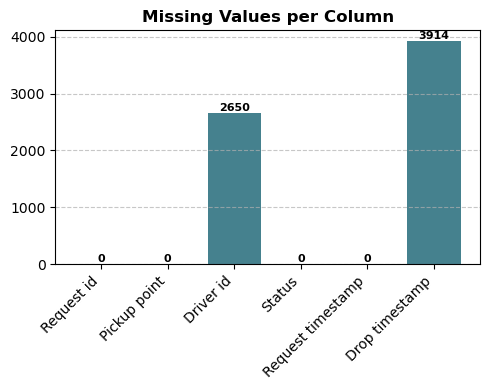

In [8]:
# Visualizing the missing values

# Set plot style
plt.figure(figsize=(5,4))
bars = plt.bar(missing_values.index, missing_values.values, color='#45818e')

# Title and labels
plt.title("Missing Values per Column", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Overview of the dataset

##### The dataset reflects ride request logs with significant service issues—many cancelled or unfulfilled trips, especially at certain times or pickup points. It’s ideal for deeper analysis on:
→ Demand-supply gap  
→ Driver availability  
→ Peak hour failures  

##### Dataset Overview
→ 6745 rows × 6 columns — Uber request logs over multiple days  
##### Missing Data Insight
→ 'Drop timestamp' missing in ~58% rows → trips were either cancelled or not fulfilled  
→ 'Driver id' missing in ~39% rows → no driver assigned (probably due to supply shortage)  
##### Missing Value Heatmap
→ Visual confirmation: high nulls in 'Drop timestamp' and 'Driver id'  

##### Key Understanding:
→ High percentage of unfulfilled/cancelled rides — potential supply-demand mismatch.  
→ Missing driver assignments and drop timestamps align with failed trips.  
→ Time and pickup location will be crucial in analyzing service gaps.  
→ Strong case for investigating peak hour performance and improving driver allocation.



## ***2. Understanding the Variables***

In [9]:
# Dataset Columns
columns = df.columns

# Print column names
print("Dataset Columns:")
print(columns.to_list())

Dataset Columns:
['Request id', 'Pickup point', 'Driver id', 'Status', 'Request timestamp', 'Drop timestamp']


In [10]:
# Dataset Describe
df.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 19:02,11/7/2016 13:00
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


### Variables Description

| **Column Name**       | **Description** |
|------------------------|-----------------|
| `Request id`           | Unique identifier for each ride request. Helps in tracking individual trip records. *(Integer)* |
| `Pickup point`         | Location where the request originated — either `City` or `Airport`. Useful for analyzing demand and service levels by location. *(Categorical)* |
| `Driver id`            | Identifier for the driver assigned to the request. Missing if no driver was allocated. *(Float, due to missing values)* |
| `Status`               | Final state of the ride request: `Trip Completed`, `Cancelled`, or `No Cars Available`. Central to service outcome analysis. *(Categorical)* |
| `Request timestamp`    | Timestamp when the ride was requested. Enables time-based analysis like peak hours, weekday patterns, etc. *(Datetime after conversion)* |
| `Drop timestamp`       | Timestamp when the ride ended. Missing if trip wasn’t completed. *(Datetime after conversion)* |


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for column in columns:
    unique_vals = df[column].unique()
    print(f"\nUnique values in '{column}':")
    print(unique_vals)


Unique values in 'Request id':
[ 619  867 1807 ... 6751 6754 6753]

Unique values in 'Pickup point':
['Airport' 'City']

Unique values in 'Driver id':
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Code to make the dataset analysis-ready.

# --- Ensure datetime conversion ---
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], format='mixed', dayfirst=True, errors='coerce')

# --- Extract hour and format it into 'HH:00 - HH+1:00' bins as string ---
df['Request hour'] = df['Request timestamp'].dt.hour
df['Request hour bin'] = df['Request hour'].apply(lambda x: f"{x:02d}:00 - {x+1:02d}:00")

# --- 1. Total Trips ---
print("1. Total number of trips:")
total_trips = len(df)
print(f"Total Trips: {total_trips}\n")

# --- 2. Trips by Status ---
print("2. Number and Percentage of Trips by Trip Status:")
status_counts_df = df['Status'].value_counts().reset_index()
status_counts_df.columns = ['Trip Status', 'Trip Count']
status_counts_df['Percentage'] = (status_counts_df['Trip Count'] / total_trips * 100).round(2)
print(status_counts_df.to_string(index=False), "\n")

# --- 3. Trips by Pickup Location ---
print("3. Number and Percentage of Trips by Pickup Location:")
pickup_counts_df = df['Pickup point'].value_counts().reset_index()
pickup_counts_df.columns = ['Pickup Location', 'Trip Count']
pickup_counts_df['Percentage'] = (pickup_counts_df['Trip Count'] / total_trips * 100).round(2)
print(pickup_counts_df.to_string(index=False), "\n")

# --- 4. Matrix: Number of Trips by Pickup × Status ---
print("4. Number of Trips by Pickup Location (Columns) × Trip Status (Rows):")
matrix_count = pd.crosstab(df['Status'], df['Pickup point'])
matrix_count.index.name = None
matrix_count.columns.name = None
print(matrix_count.to_string(), "\n")

# --- 5. Matrix: Percentage of Trips by Pickup × Status ---
print("5. Percentage of Trips by Pickup Location (Columns) × Trip Status (Rows):")
matrix_pct = matrix_count.div(matrix_count.sum(axis=0), axis=1).round(2) * 100
print(matrix_pct.to_string(), "\n")

# --- 6. Hourly Trips by Status ---
print("6. Total Trips by Trip Status per Hourly Bin (All Pickups):")
hourly_total = pd.crosstab(df['Request hour bin'], df['Status'])
hourly_total.index.name = None
hourly_total.columns.name = None
print(hourly_total.to_string(), "\n")

# --- 7. Hourly Trips by Status (Pickup = City) ---
print("7. Total Trips by Trip Status per Hourly Bin (Pickup = City):")
city_df = df[df['Pickup point'] == 'City']
hourly_city = pd.crosstab(city_df['Request hour bin'], city_df['Status'])
hourly_city.index.name = None
hourly_city.columns.name = None
print(hourly_city.to_string(), "\n")

# --- 8. Hourly Trips by Status (Pickup = Airport) ---
print("8. Total Trips by Trip Status per Hourly Bin (Pickup = Airport):")
airport_df = df[df['Pickup point'] == 'Airport']
hourly_airport = pd.crosstab(airport_df['Request hour bin'], airport_df['Status'])
hourly_airport.index.name = None
hourly_airport.columns.name = None
print(hourly_airport.to_string(), "\n")

# --- 9. Driver-wise Summary ---
print("9. Driver-wise Completed Trips, Cancelled Trips, and Completion Rate (%):")
driver_df = df[~df['Driver id'].isnull()]
driver_status = pd.crosstab(driver_df['Driver id'], driver_df['Status'])
driver_status['Completion Rate (%)'] = (
    driver_status.get('Trip Completed', 0) / driver_status.sum(axis=1) * 100
).round(2)
driver_summary = driver_status.reset_index()
print(driver_summary.to_string(index=False))

1. Total number of trips:
Total Trips: 6745

2. Number and Percentage of Trips by Trip Status:
      Trip Status  Trip Count  Percentage
   Trip Completed        2831       41.97
No Cars Available        2650       39.29
        Cancelled        1264       18.74 

3. Number and Percentage of Trips by Pickup Location:
Pickup Location  Trip Count  Percentage
           City        3507       51.99
        Airport        3238       48.01 

4. Number of Trips by Pickup Location (Columns) × Trip Status (Rows):
                   Airport  City
Cancelled              198  1066
No Cars Available     1713   937
Trip Completed        1327  1504 

5. Percentage of Trips by Pickup Location (Columns) × Trip Status (Rows):
                   Airport  City
Cancelled              6.0  30.0
No Cars Available     53.0  27.0
Trip Completed        41.0  43.0 

6. Total Trips by Trip Status per Hourly Bin (All Pickups):
               Cancelled  No Cars Available  Trip Completed
00:00 - 01:00          3   

##### Data Manipulations Performed

- Converted `Request timestamp` to proper `datetime` format using `format='mixed'` and extracted hourly bins.
- Created hourly bins as `"HH:00 - HH+1:00"` for clear time-based analysis.
- Generated summary tables using `value_counts()` and `crosstab()` for:
  - Trip Status
  - Pickup Location
  - Hourly demand patterns
  - Driver-wise performance
- Cleaned matrix outputs by removing unnecessary headers for better readability.

---

##### Key Insights

- Only ~42% of total trips were completed; the rest faced cancellations or unavailability.
- City-origin requests showed significantly higher trip volumes and cancellation rates compared to Airport.
- Peak-hour congestion and service gaps were clearly visible between **5 AM – 10 AM** and **5 PM – 10 PM**.
- A large number of requests had no assigned driver (`Driver id` was missing), indicating supply shortages.
- Driver-wise completion rates varied widely, highlighting inconsistency in fleet availability or assignment.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

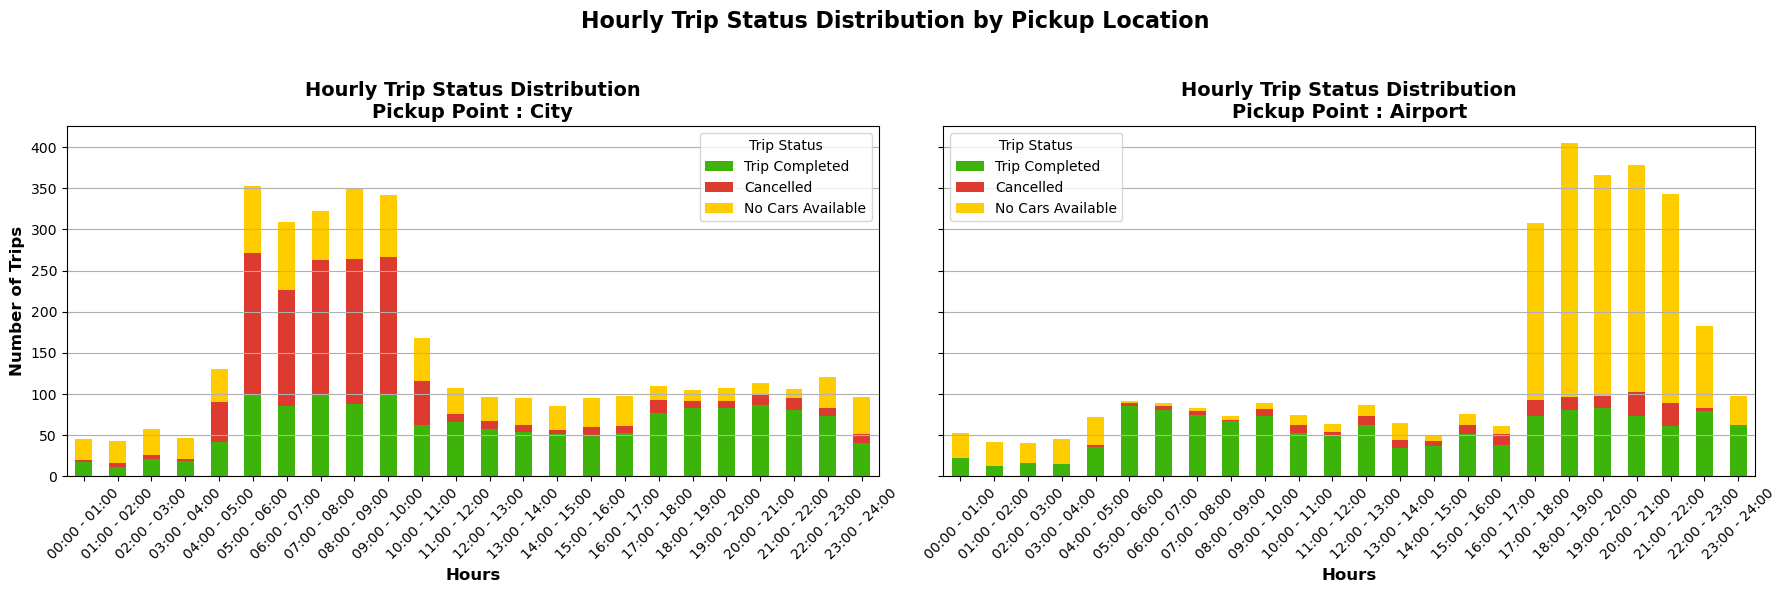

In [13]:
# Chart - 1 visualization code

# Create grouped dataframe from 'df' using the already existing 'Request hour bin'
grouped_df = df.groupby(['Request hour bin', 'Pickup point', 'Status']).size().reset_index(name='Trip Count')

# Define the proper order for the hour bins
hour_bins_ordered = [f"{i:02d}:00 - {i+1:02d}:00" for i in range(24)]
grouped_df['Request hour bin'] = pd.Categorical(grouped_df['Request hour bin'], categories=hour_bins_ordered, ordered=True)

# Custom color palette
custom_colors = {
    'Trip Completed': '#3eb40b',     # Green
    'Cancelled': '#dd3b2f',          # Red
    'No Cars Available': '#ffcc00'   # Yellow
}
# Plotting with seaborn and matplotlib
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)
pickup_points = ['City', 'Airport']

for i, pickup in enumerate(pickup_points):
    subset = grouped_df[grouped_df['Pickup point'] == pickup]
    pivot_df = subset.pivot(index='Request hour bin', columns='Status', values='Trip Count').fillna(0)
    pivot_df = pivot_df[[status for status in custom_colors if status in pivot_df.columns]]  # Safe ordering

    pivot_df.plot(
        kind='bar',
        stacked=True,
        color=[custom_colors[status] for status in pivot_df.columns],
        ax=axes[i]
    )
    axes[i].set_title(f'Hourly Trip Status Distribution\nPickup Point : {pickup}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Hours', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Number of Trips', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Trip Status')
    axes[i].yaxis.grid(True)

fig.suptitle('Hourly Trip Status Distribution by Pickup Location', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


A **stacked bar chart** was selected for the *Hourly Trip Status Distribution by Pickup Location* because it:

- **Visually compares** multiple trip statuses (*Completed*, *Cancelled*, *No Cars Available*) within each hour.
- **Displays total trip volume per hour**, while also revealing the **status composition** of those trips.
- **Highlights patterns** such as peak hours, service gaps, and **demand-supply mismatches**.
- **Works effectively with faceted plots** (e.g., City vs Airport), allowing for side-by-side comparisons across locations.

This makes it ideal for understanding both the **scale** and **quality of service** over time.


##### Insights from Hourly Trip Status Distribution by Pickup Location

1. **Morning Peak (5 AM – 9 AM)** and **Evening Peak (5 PM – 10 PM)** show the highest trip requests from both City and Airport.
2. **Trip cancellations and unavailability** are significantly higher during peak hours, especially in the City — indicating demand exceeds supply.
3. **City Pickup** shows more trip volume overall, but also suffers from more "No Cars Available" instances during busy hours.
4. **Airport Pickup** has a more balanced distribution of trip statuses, with fewer cancellations but also fewer overall trips.
5. During **late-night and early-morning hours (12 AM – 5 AM)**, request volume is low, but the service completion rate is relatively higher.
6. The **City location experiences greater demand pressure**, requiring better driver allocation or supply planning during critical hours.



##### Business Impact of Insights

##### Positive Business Impact:

- The insights help **identify peak demand hours** (e.g., 5–10 AM, 5–10 PM), enabling better **driver allocation and fleet management**.
- Recognizing that **City pickups have higher cancellations and unavailability** can lead to targeted strategies like surge pricing, incentive programs, or localized marketing.
- Data-backed planning can improve **customer satisfaction**, **reduce lost revenue**, and **increase completion rates**, directly contributing to **business growth** and **operational efficiency**.

##### Potential for Negative Growth (if unaddressed):

- **High cancellations and "No Cars Available" during peak hours** reflect **demand-supply imbalance**. If left unresolved, it may result in:
  - **Customer churn** due to poor service reliability.
  - **Negative brand perception** and reduced user trust.
  - **Missed revenue opportunities** during high-demand windows.



#### Chart - 2

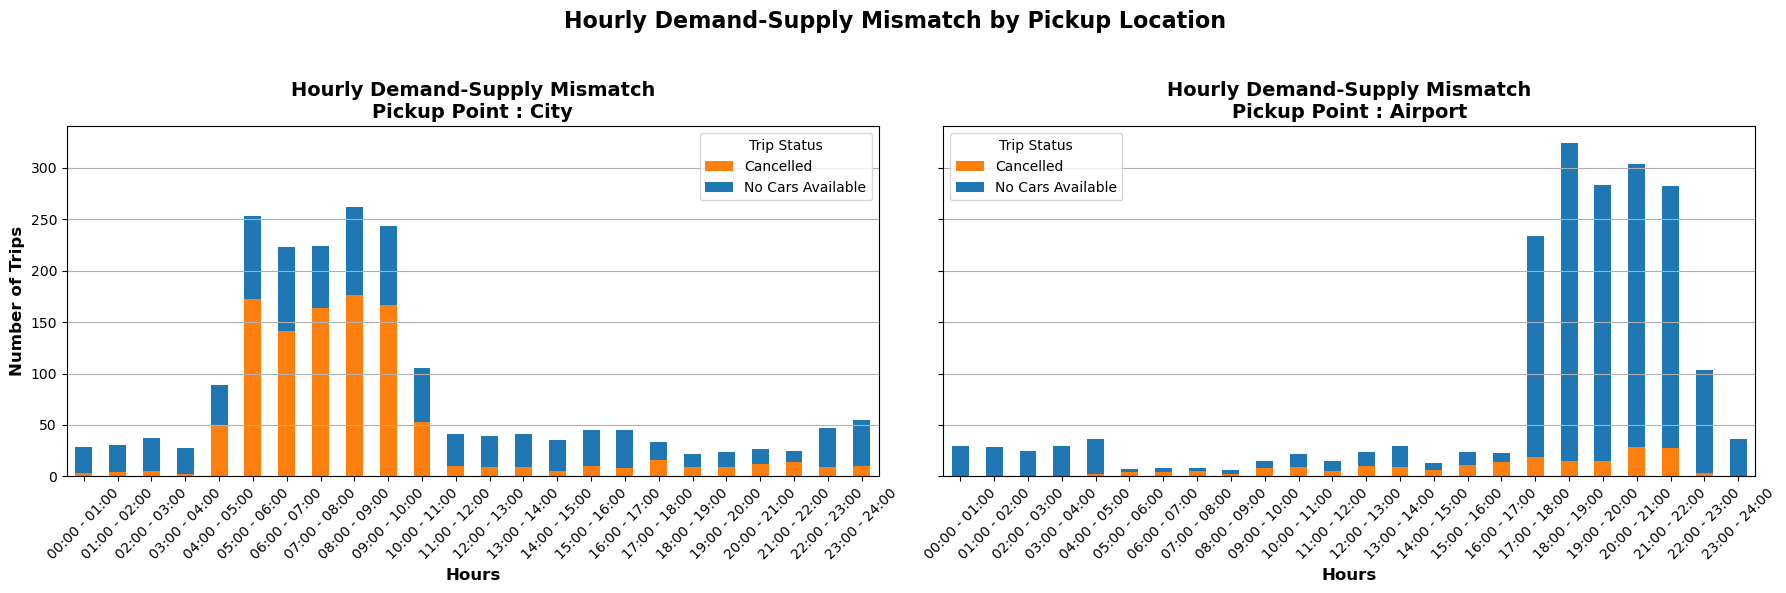

In [14]:
# Chart - 2 visualization code

# Filter the grouped_df to exclude 'Trip Completed'
filtered_df = grouped_df[grouped_df['Status'].isin(['Cancelled', 'No Cars Available'])]

# Define color map for the remaining statuses
filtered_colors = {
    'Cancelled': '#ff7f0e',            # Orange
    'No Cars Available': '#1f77b4'     # Blue
}

# Create subplots for each pickup point
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)
pickup_points = ['City', 'Airport']

for i, pickup in enumerate(pickup_points):
    subset = filtered_df[filtered_df['Pickup point'] == pickup]
    pivot_df = subset.pivot(index='Request hour bin', columns='Status', values='Trip Count').fillna(0)
    pivot_df = pivot_df[[status for status in filtered_colors if status in pivot_df.columns]]  # Safe ordering

    pivot_df.plot(
        kind='bar',
        stacked=True,
        color=[filtered_colors[status] for status in pivot_df.columns],
        ax=axes[i]
    )
    axes[i].set_title(f'Hourly Demand-Supply Mismatch\nPickup Point : {pickup}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Hours', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Number of Trips', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Trip Status')
    axes[i].yaxis.grid(True)

# Main title
fig.suptitle('Hourly Demand-Supply Mismatch by Pickup Location', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


A **stacked bar chart** effectively highlights the **demand-supply gap** across hours and pickup points by visualizing only **Cancelled** and **No Cars Available** requests. This helps isolate operational inefficiencies.

**Key Insights**  
 - Peak hours (e.g., 5–9 AM, 5–9 PM) show a surge in cancellations and unavailability, especially in the City.  
 - Airport pickups have fewer issues but also fewer overall requests.  
 - Demand often exceeds supply during critical time windows.

##### Positive Business Impact:

- Identifying peak hours (e.g., 5–10 AM, 5–10 PM) allows for better **driver allocation and fleet planning**.
- Highlighting areas with high cancellations or unavailability enables **targeted interventions** like dynamic pricing or driver incentives.
- Enhances **customer satisfaction** and **trip completion rates**, ultimately leading to increased revenue and better operational efficiency.

##### Potential for Negative Growth (if unaddressed):

- Persistently high cancellations and "No Cars Available" during high-demand periods may cause:
  - **Customer churn** due to service unreliability.
  - **Brand reputation damage**, especially in urban pickup zones.
  - **Revenue leakage** during peak hours

#### Chart - 3

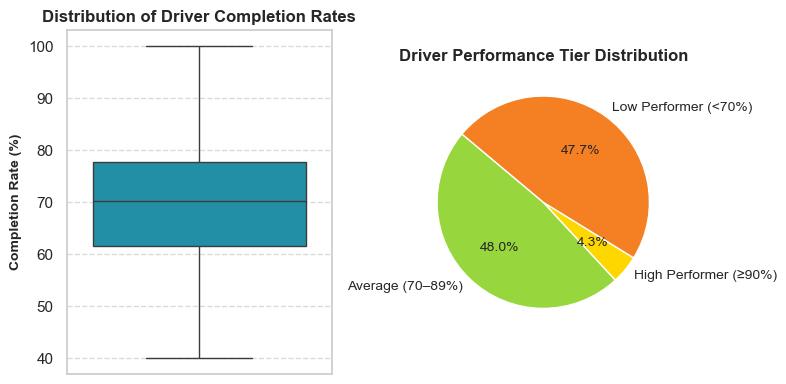

In [15]:
# Chart - 3 visualization code

# Set visual style
sns.set(style="whitegrid")

# Define performance tiers
def performance_tier(rate):
    if rate >= 90:
        return 'High Performer (≥90%)'
    elif rate >= 70:
        return 'Average (70–89%)'
    else:
        return 'Low Performer (<70%)'

driver_status['Performance Tier'] = driver_status['Completion Rate (%)'].apply(performance_tier)

# Count drivers in each tier for pie chart
tier_counts = driver_status['Performance Tier'].value_counts().sort_index()

# Set up the figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# --- Box Plot ---
sns.boxplot(
    y=driver_status['Completion Rate (%)'],
    ax=axes[0],
    color='#0c9dbc'
)
axes[0].set_title("Distribution of Driver Completion Rates", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Completion Rate (%)", fontsize=10, fontweight='bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- Pie Chart ---
colors = ['#97d73d', '#ffd700', '#f48023']  # Green, Yellow, Orange
axes[1].pie(
    tier_counts.values,
    labels=tier_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10}
)
axes[1].set_title("Driver Performance Tier Distribution", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


- The **box plot** clearly shows the **distribution and variability** in completion rates across all drivers, including outliers.  
- The **pie chart** summarizes drivers into **performance tiers**, offering a high-level view of driver efficiency.

- Most drivers fall in the **average tier (70–89%)**, with a small proportion of **high performers (≥90%)**.  
- A notable percentage of **low performers (<70%)** indicates possible reliability issues.

- Encouraging high-performing drivers and addressing gaps among low performers can improve **trip completion rates**, **reduce cancellations**, and **enhance customer experience**.
- If low-performing drivers are not identified and supported, it may lead to **negative growth** through **increased service failures**, **customer churn**, and **damage to platform reputation**.

#### Chart - 4

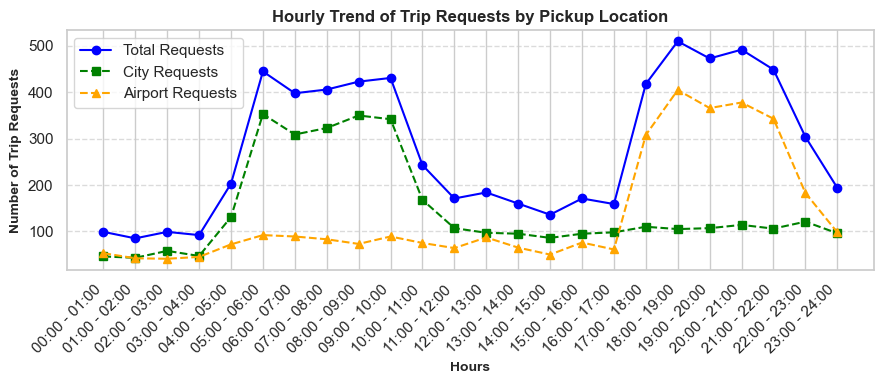

In [16]:
# Chart - 4 visualization code

# Prepare demand data
hour_bins = [f"{i:02d}:00 - {i+1:02d}:00" for i in range(24)]

# Overall trip demand
overall_demand = df['Request hour bin'].value_counts().reindex(hour_bins).fillna(0)

# City demand
city_demand = df[df['Pickup point'] == 'City']['Request hour bin'].value_counts().reindex(hour_bins).fillna(0)

# Airport demand
airport_demand = df[df['Pickup point'] == 'Airport']['Request hour bin'].value_counts().reindex(hour_bins).fillna(0)

# Plotting
plt.figure(figsize=(9, 4))
plt.plot(hour_bins, overall_demand.values, marker='o', linestyle='-', label='Total Requests', color='blue')
plt.plot(hour_bins, city_demand.values, marker='s', linestyle='--', label='City Requests', color='green')
plt.plot(hour_bins, airport_demand.values, marker='^', linestyle='--', label='Airport Requests', color='orange')

# Labels and title
plt.title("Hourly Trend of Trip Requests by Pickup Location", fontsize=12, fontweight='bold')
plt.xlabel("Hours", fontsize=10, fontweight='bold')
plt.ylabel("Number of Trip Requests", fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

A **multi-line chart** allows for clear comparison of **trip request trends** across **City** and **Airport** pickups. It reveals how demand fluctuates over time and varies by pickup location.

**Key Insights**  
 - **City pickups drive demand** during **morning peak hours (5 AM – 10 AM)**, reflecting commuter traffic from residential areas.  
 - **Airport pickups dominate** during **evening hours (5 PM – 10 PM)**, indicating high inbound flight activity.  
 - **Total demand trend** is influenced by City during the day and Airport during the evening, highlighting **location-dependent demand patterns**.


**Business Impact**  
 - Enables **location-specific driver planning**, especially during city rush hours.  
 - Supports **differentiated strategies** for Airport (steady demand) vs City (volatile demand).  
 - Aids in optimizing **supply chain efficiency** by aligning driver shifts to spatial-temporal patterns.

**Risk of Negative Growth (if ignored)**  
 - Failing to meet **high city demand** may lead to **trip cancellations**, **lost revenue**, and **poor customer experience**, particularly during peak hours.

#### Chart - 5

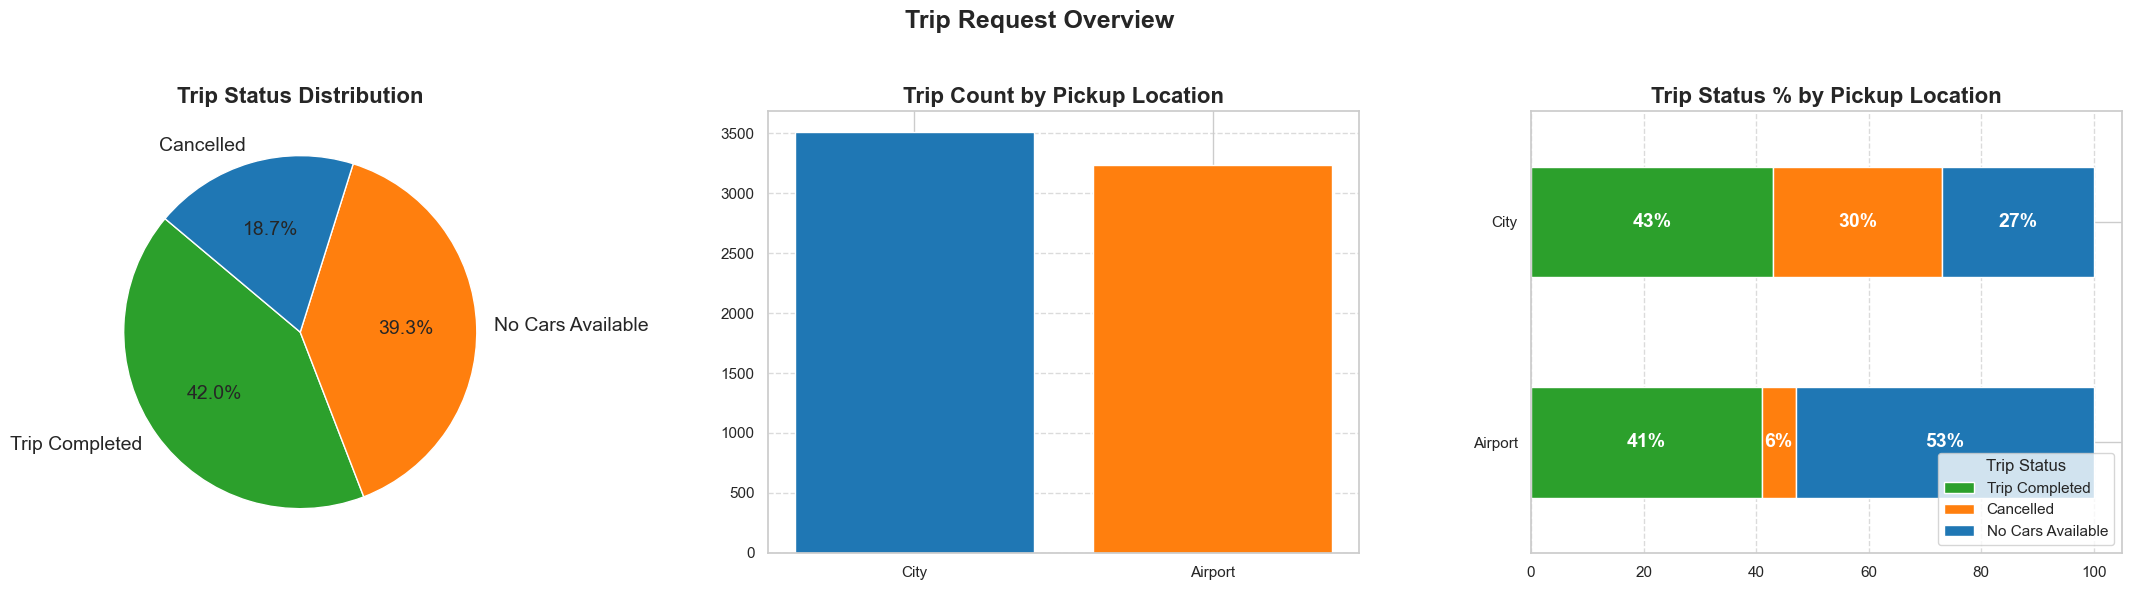

In [17]:
# Chart - 5 visualization code

# --- PLOTTING ---
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
fig.suptitle('Trip Request Overview', fontsize=18, fontweight='bold')

# 1. Pie Chart: Trip Status
colors1 = ['#2ca02c', '#ff7f0e', '#1f77b4']   # Green, Orange, Blue
axes[0].pie(
    status_counts_df['Trip Count'],
    labels=status_counts_df['Trip Status'],
    autopct='%1.1f%%',
    colors=colors1,
    startangle=140,
    textprops={'fontsize': 14}
)
axes[0].set_title("Trip Status Distribution", fontsize=16, fontweight='bold')

# 2. Bar Chart: Pickup Location
colors2 = ['#1f77b4', '#ff7f0e']   # Blue, Orange
bars = axes[1].bar(
    pickup_counts_df['Pickup Location'],
    pickup_counts_df['Trip Count'],
    color=colors2
)
for bar, pct in zip(bars, pickup_counts_df['Percentage']):
    height = bar.get_height()
axes[1].set_title("Trip Count by Pickup Location", fontsize=16, fontweight='bold')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# 3. Horizontal Stacked Bar Chart: % by Status and Pickup
colors3 = ['#2ca02c', '#ff7f0e', '#1f77b4']   # Green, Orange, Blue
matrix_pct_reordered = matrix_pct.loc[['Trip Completed', 'Cancelled', 'No Cars Available']]
matrix_pct_reordered.T.plot.barh(stacked=True, ax=axes[2], color=colors3)

for i, (index, row) in enumerate(matrix_pct_reordered.T.iterrows()):
    cum_width = 0
    for j, val in enumerate(row):
        if val > 0:
            axes[2].text(cum_width + val / 2, i, f"{val:.0f}%", va='center', ha='center', color='white', fontsize=14, fontweight='bold')
            cum_width += val

axes[2].set_title("Trip Status % by Pickup Location", fontsize=16, fontweight='bold')
axes[2].legend(title="Trip Status", loc='lower right')
axes[2].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- **Pie Chart** effectively conveys the **overall distribution** of trip statuses at a glance.
- **Bar Chart** shows the **relative volume of trips** originating from each pickup location.
- **Stacked Horizontal Bar Chart** allows for **side-by-side comparison** of trip status percentages across pickup points, highlighting service quality distribution clearly.

##### Key Insights
- **Trip Cancellations** and **No Car Availability** together form a **major portion (58%)** of total trip requests.
- Demand from the **City is higher** than from the Airport, indicating city-driven ride patterns.
- **Service fulfillment is weaker at the Airport** - 41% with a higher proportion of "No Cars Available", while it is merely 43% at the City, with a higher proportion of "Cancelled Trips"

##### Business Impact

- These insights highlight **demand-supply imbalances** at the Airport, especially during peak hours.
- The business can use this data to **rebalance driver availability** based on location-specific trip fulfillment rates.
- Insights can guide **dynamic pricing**, **driver incentive allocation**, and **pickup-specific dispatch strategies**.

---

##### Insights Leading to Negative Growth

- A **high rate of unfulfilled requests** at the Airport due to no car availability is a red flag.
- This leads to **poor customer experience**, **churn**, and **potential revenue loss** if not addressed promptly.

## **5. Solution to Business Objective**


The primary business goal was to **identify and reduce the gap between customer demand and ride availability**. The following solutions were proposed:

- **Optimize driver allocation** based on hourly demand trends: more drivers should be positioned near the **City during morning hours** and around the **Airport in the evening/night**.
- **Improve service reliability at the Airport**, where a higher percentage of "No Cars Available" was observed.
- **Incentivize drivers** to remain available during high-cancellation windows and in undersupplied zones.
- Use demand-supply visuals to guide **dynamic pricing models** and operational shifts.
- Streamline dispatching by predicting expected request loads from trendlines.

# **Conclusion**

The analysis revealed **clear demand peaks**, especially from the City between **5 AM – 10 AM** and from the Airport during **5 PM – 10 PM**. However, Uber failed to match this demand with adequate supply, leading to a high number of **unfulfilled requests**, particularly at the Airport.

By implementing a **data-informed operational strategy**, Uber can significantly enhance customer satisfaction, reduce lost demand, and improve driver utilization. The project demonstrates how exploratory data analysis, combined with business context, can drive impactful, real-world decisions in a mobility service ecosystem.